In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X,y)
y_predict = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.3f}".format(accuracy_score(y,y_predict)))

Accuracy: 1.000


In [5]:
from sklearn.model_selection import train_test_split
# 将数据集的70%样本作为训练集，30%样本作为测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=0.7)
# 用k近邻分类器模型拟合训练数据，设置超参数为n_neighbors=1
model.fit(X_train,y_train)
# 在测试集中评估模型准确率
y_test_predict = model.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_test_predict)))

Accuracy: 0.978


In [6]:
from sklearn.model_selection import cross_val_score
# 设置k折交叉验证的超参数cv=10
cross_val_score(model,X,y,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [7]:
cross_val_score(model,X,y,cv=10).mean()

0.96

In [8]:
from sklearn.model_selection import GridSearchCV
# 根据参数可行集设定搜索网格
parameters = {"n_neighbors":list(range(5,11,1)),
              "p":[1,2],
              "weights":["uniform","distance"]}
# 设置10折交叉验证，以测试集正确率最高选择最优的参数组合
model = GridSearchCV(KNeighborsClassifier(),parameters,cv=10,scoring="accuracy")
model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [9]:
print("最优参数：",model.best_params_)
print("验证集最高得分：",model.best_score_)

最优参数： {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
验证集最高得分： 0.9609090909090909


In [10]:
best_model = model.best_estimator_
y_test_best_predict = best_model.predict(X_test)
accuracy_score(y_test,y_test_best_predict)

0.9777777777777777

In [11]:
import pandas as pd
credit = pd.read_csv("german.csv",header=None)
credit.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
5,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1
6,4,24,2,28,3,5,3,4,2,53,...,0,0,1,0,0,1,0,0,1,1
7,2,36,2,69,1,3,3,2,3,35,...,0,1,1,0,1,0,0,0,0,1
8,4,12,2,31,4,4,1,4,1,61,...,0,0,1,0,0,1,0,1,0,1
9,2,30,4,52,1,1,4,2,3,28,...,1,0,1,0,0,1,0,0,0,2


In [12]:
from sklearn.model_selection import train_test_split
X = credit.iloc[:,0:24]
y = credit.iloc[:,24]
y[y!=1] = 0
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=1/5)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l2",C=1)

In [14]:
model.fit(X_train,y_train)
y_test_predict = model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_test_predict)))
print("Precision: {:.3f}".format(precision_score(y_test,y_test_predict)))
print("Recall: {:.3f}".format(recall_score(y_test,y_test_predict)))
print("F1: {:.3f}".format(f1_score(y_test,y_test_predict)))

Accuracy: 0.765
Precision: 0.790
Recall: 0.908
F1: 0.845


In [16]:
y_test_predict_p = model.predict_proba(X_test)
y_test_predict_p[0:5]

array([[0.5796646 , 0.4203354 ],
       [0.88040045, 0.11959955],
       [0.25623077, 0.74376923],
       [0.66069027, 0.33930973],
       [0.77162816, 0.22837184]])

In [17]:
from sklearn.metrics import roc_curve, auc
FPR,TPR,threshold = roc_curve(y_test,y_test_predict_p[:,1])

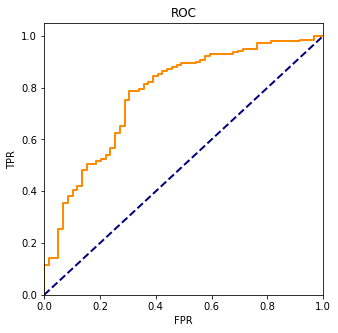

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(FPR,TPR,color='darkorange',lw=2)
plt.plot([0,1],[0,1], color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
print("AUC: {:.3f}".format(roc_auc_score(y_test,y_test_predict_p[:,1])))

AUC: 0.773


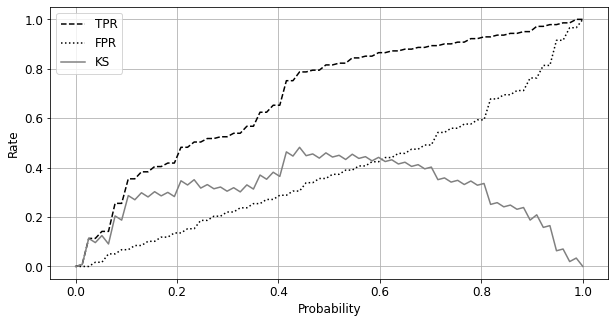

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,1,len(TPR)),TPR,'--',color='black',label='TPR')
plt.plot(np.linspace(0,1,len(TPR)),FPR,':',color='black',label='FPR')
plt.plot(np.linspace(0,1,len(TPR)),TPR-FPR,'-',color='gray',label='KS')
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Probability",fontsize=12)
plt.ylabel("Rate",fontsize=12)
plt.legend(fontsize=12)

In [21]:
print("KS: {:.3f}".format(max(TPR-FPR)))

KS: 0.482
